Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций понадобилось?


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Итарации остановлены на шаге 208


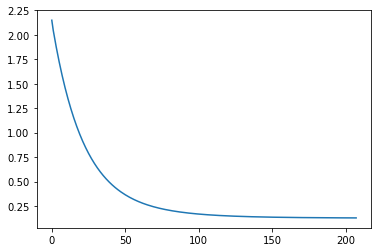

In [127]:
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(2), 0.0001
weight_evolution, mse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    mse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), mse_evolution)

In [128]:
reg = SGDRegressor(learning_rate='constant', eta0=0.1, fit_intercept=True, random_state=42, max_iter=100)
reg.fit(X_train, y_train)
print(reg.coef_)
print('Метрика качества r2_score %00.5f' %(r2_score(y_valid, reg.predict(X_valid))))

[-0.46807937]
Метрика качества r2_score 0.59318


In [166]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [167]:
reg = SGDRegressor(learning_rate='constant', eta0=0.001, fit_intercept=True, random_state=10, max_iter=1000)
reg.fit(X_train, y_train)
print(reg.coef_)
y_pred = reg.predict(X_test)
error = r2_score(y_test, y_pred)
                 
print(error )

[ 2.43301788e+11 -5.06440712e+10 -7.94198316e+10 -1.59974606e+10
  3.47275687e+09  6.04108381e+10  1.14749464e+11  3.06753724e+10
 -8.03554063e+10 -1.45434356e+11  4.57348081e+10 -2.01277640e+11
 -1.16242126e+11]
-2.1922665048078686e+26
